# 数据读取
## Dataset 类
PyTorch 中的 Dataset 类是一个抽象类，它可以用来表示数据集。
通过继承 Dataset 类来自定义数据集的格式、大小和其它属性，后面就可以供 DataLoader 类直接使用。其实这就表示，无论使用自定义的数据集，还是官方为我们封装好的数据集，其本质都是继承了 Dataset 类。

Dataset 类的构造函数接收两个参数：data_tensor 和 target_tensor，分别表示数据集的输入数据和标签。
在继承 Dataset 类时，至少需要重写以下几个方法：
* __init__()：构造函数，可自定义数据读取方法以及进行数据预处理；
* __len__()：返回数据集大小；
* __getitem__()：索引数据集中的某一个数据。

示例：使用 Dataset 类定义一个 Tensor 类型的数据集 MyDataset

In [2]:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    # 构造函数
    def __init__(self, data_tensor, target_tensor):
        self.data_tensor = data_tensor
        self.target_tensor = target_tensor
    # 返回数据集大小
    def __len__(self):
        return self.data_tensor.size(0)
    # 返回索引的数据与标签
    def __getitem__(self, index):
        return self.data_tensor[index], self.target_tensor[index]

In [15]:
# 生成数据
data_tensor = torch.randn(5, 3) # 随机生成一个 5*3 维的数据 Tensor
target_tensor = torch.randint(2, (5,)) # 随机生成一个大小为 5 的一维数组，数值区间 [0, 2）
print(f"data_tensor:\n{data_tensor}")
print(f"\ntarget_tensor:\n{target_tensor}")

# 使用以上两个 Tensor，生成一个 MyDataset 的对象。
my_dataset = MyDataset(data_tensor, target_tensor)

# 查看数据集大小
print('\nDataset size:', len(my_dataset))

# 使用索引调用数据
print(f"\nmy_dataset[0]: {my_dataset[0]}" )

for dataset in my_dataset:
    print(f"\ndata_tensor: {dataset[0]}: target_tensor: {dataset[1]}")

data_tensor:
tensor([[-1.1371,  0.1348, -0.7955],
        [ 0.1024,  1.6879,  0.1419],
        [-0.8921, -0.0710,  1.2000],
        [ 1.1474,  1.4946,  0.3799],
        [-1.1198, -1.1962,  0.3498]])

target_tensor:
tensor([1, 1, 1, 1, 0])

Dataset size: 5

my_dataset[0]: (tensor([-1.1371,  0.1348, -0.7955]), tensor(1))
2

data_tensor: tensor([-1.1371,  0.1348, -0.7955]): target_tensor: 1
2

data_tensor: tensor([0.1024, 1.6879, 0.1419]): target_tensor: 1
2

data_tensor: tensor([-0.8921, -0.0710,  1.2000]): target_tensor: 1
2

data_tensor: tensor([1.1474, 1.4946, 0.3799]): target_tensor: 1
2

data_tensor: tensor([-1.1198, -1.1962,  0.3498]): target_tensor: 0


## DataLoader 类
DataLoader 类是一个迭代器，用于从数据集中批量获取数据。
最基本的使用方法就是传入一个 Dataset 对象，它会根据参数 batch_size 的值生成一个 batch 的数据，节省内存的同时，它还可以实现多进程、数据打乱等处理。
DataLoader 类的构造函数接收以下参数：
* dataset：数据集对象；
* batch_size：批量大小；
* shuffle：是否打乱数据；
* num_workers：多进程数；
* collate_fn：数据处理函数。

In [16]:
from torch.utils.data import DataLoader
print(my_dataset[0])
tensor_dataloader = DataLoader(dataset=my_dataset, # 传入的数据集, 必须参数
                               batch_size=2,       # 一个 batch 的大小
                               shuffle=True,       # 数据是否打乱
                               num_workers=0)      # 进程数, 0表示只有主进程

# 以循环形式输出
for data, target in tensor_dataloader:
    print(f"\ndata:{data}, target:{target}")

# 输出一个batch
print('One batch tensor data: ', next(iter(tensor_dataloader)))


(tensor([-1.1371,  0.1348, -0.7955]), tensor(1))

data:tensor([[ 0.1024,  1.6879,  0.1419],
        [-0.8921, -0.0710,  1.2000]]), target:tensor([1, 1])

data:tensor([[ 1.1474,  1.4946,  0.3799],
        [-1.1371,  0.1348, -0.7955]]), target:tensor([1, 1])

data:tensor([[-1.1198, -1.1962,  0.3498]]), target:tensor([0])
One batch tensor data:  [tensor([[ 0.1024,  1.6879,  0.1419],
        [-1.1371,  0.1348, -0.7955]]), tensor([1, 1])]


# Torchvision
Torchvision 是一个用于计算机视觉的 Python 包，它提供了一些常用的数据集、经典网络模型、图像处理的工具等等。主要供数据预处理阶段使用。

Torchvision 库就是常用数据集 + 常见网络模型 + 常用图像处理方法

Torchvision 中默认使用的图像加载器是 PIL，因此为了确保 Torchvision 正常运行，还需要安装一个 Python 的第三方图像处理库——Pillow 库。
Pillow 提供了广泛的文件格式支持，强大的图像处理能力，主要包括图像储存、图像显示、格式转换以及基本的图像处理操作等。

Torchvision & Pillow 的安装

In [ ]:
#!pip install torchvision
#!pip install pillow

## 利用 Torchvision 读取数据
Torchvision 库中的torchvision.datasets包中提供了丰富的图像数据集的接口。常用的图像数据集，例如 MNIST、COCO 等，这个模块都为我们做了相应的封装。

各个数据集的说明与接口，详见链接https://pytorch.org/vision/stable/datasets.html。

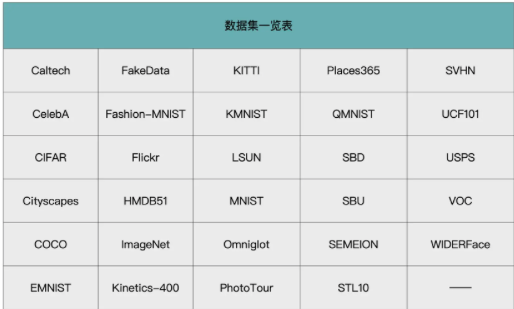

torchvision.datasets这个包本身并不包含数据集的文件本身，它的工作方式是先从网络上把数据集下载到用户指定目录，然后再用它的加载器把数据集加载到内存中。最后，把这个加载后的数据集作为对象返回给用户。


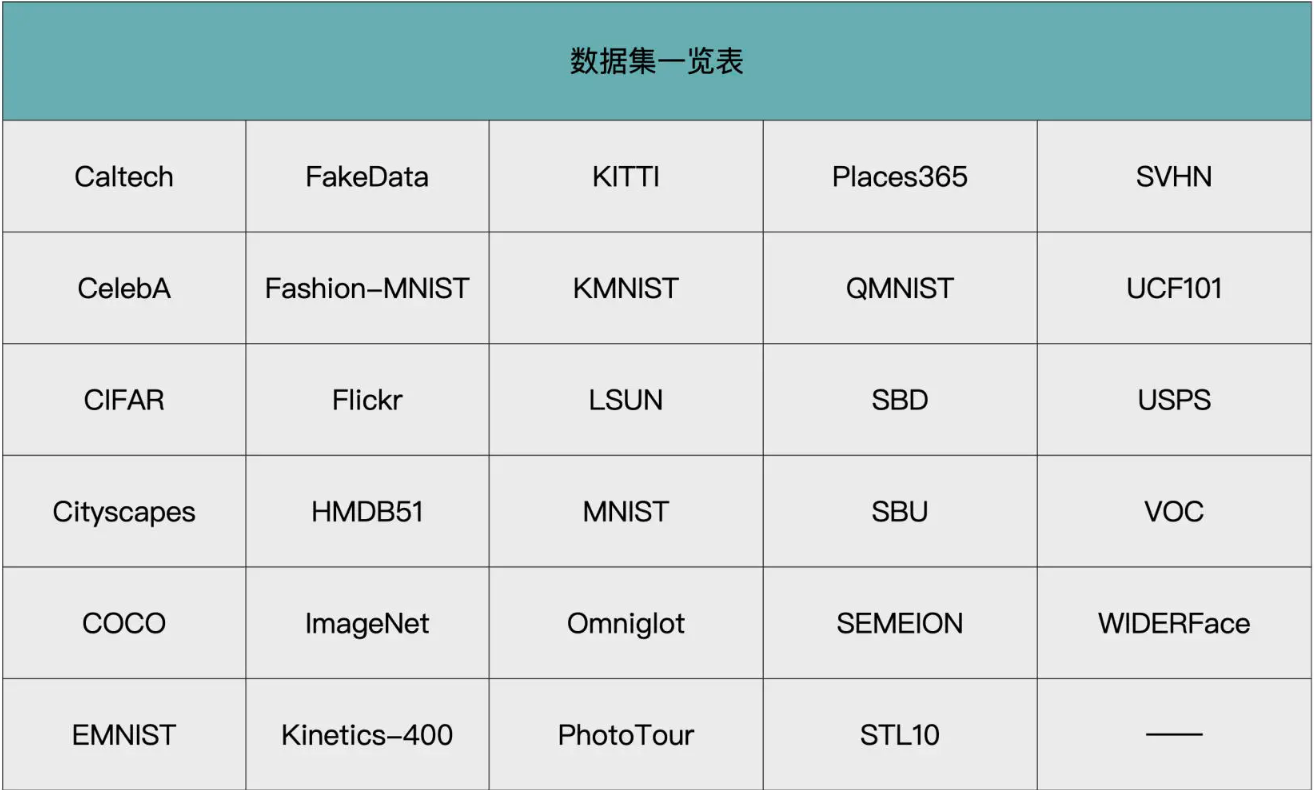
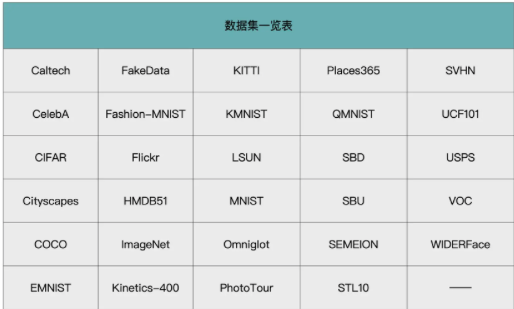

### MNIST 数据集

MNIST 数据集是一个著名的手写数字数据集，因为上手简单，在深度学习领域，手写数字识别是一个很经典的学习入门样例。

示例：利用 Torchvision 读取 MNIST 数据集

In [19]:
# 以MNIST为例
import torchvision
mnist_dataset = torchvision.datasets.MNIST(root='../data',
                                       train=False,
                                       transform=None,
                                       target_transform=None,
                                       download=True)
type(mnist_dataset)

torchvision.datasets.mnist.MNIST

用 type 函数查看一下 mnist_dataset 的类型，就可以得到 torchvision.datasets.mnist.MNIST，这个类是之前我们介绍过的 Dataset 类的派生类。相当于torchvision.datasets ，它已经帮我们写好了对 Dataset 类的继承，完成了对数据集的封装，我们直接使用即可。

### 自定义数据集
对于那些没有官方接口的图像数据集，我们也可以使用以torchvision.datasets.ImageFolder接口来自行定义


## 数据预览
要查看 mnist_dataset 中的具体内容，我们需要把它转化为列表

In [22]:
mnist_dataset_list = list(mnist_dataset)
# 查看数据集信息
print(mnist_dataset_list)

[(<PIL.Image.Image image mode=L size=28x28 at 0x1570521D0>, 7), (<PIL.Image.Image image mode=L size=28x28 at 0x157052620>, 2), (<PIL.Image.Image image mode=L size=28x28 at 0x157051F90>, 1), (<PIL.Image.Image image mode=L size=28x28 at 0x157051300>, 0), (<PIL.Image.Image image mode=L size=28x28 at 0x157052980>, 4), (<PIL.Image.Image image mode=L size=28x28 at 0x157051360>, 1), (<PIL.Image.Image image mode=L size=28x28 at 0x157050D00>, 4), (<PIL.Image.Image image mode=L size=28x28 at 0x157051A20>, 9), (<PIL.Image.Image image mode=L size=28x28 at 0x157050340>, 5), (<PIL.Image.Image image mode=L size=28x28 at 0x157050190>, 9), (<PIL.Image.Image image mode=L size=28x28 at 0x157051690>, 0), (<PIL.Image.Image image mode=L size=28x28 at 0x157051240>, 6), (<PIL.Image.Image image mode=L size=28x28 at 0x157050A90>, 9), (<PIL.Image.Image image mode=L size=28x28 at 0x157050D60>, 0), (<PIL.Image.Image image mode=L size=28x28 at 0x157052950>, 1), (<PIL.Image.Image image mode=L size=28x28 at 0x1570522

转换后的数据集对象变成了一个元组列表，每个元组有两个元素，第一个元素是图像数据，第二个元素是图像的标签。

In [23]:
display(mnist_dataset_list[0][0])
print("Image label is:", mnist_dataset_list[0][1])

Image label is: 7


In [32]:
print(f"\n测试数据集大小: {len(mnist_dataset)}")

# 查看前几个样本的信息
for i in range(3):
    print(f"\n样本 {i}: {display(mnist_dataset[i][0])}, \n标签 {mnist_dataset[i][1]}")


测试数据集大小: 10000



样本 0: None, 
标签 7



样本 1: None, 
标签 2



样本 2: None, 
标签 1


## 图像处理工具之 torchvision.transforms
torchvision.transforms 是一个图像处理工具包，提供了丰富的图像处理方法，例如裁剪、缩放、旋转、翻转、颜色转换等等。

### 数据类型转换

在上述数据集的示例中，通过 torchvision.datasets.MNIST 函数，已经把数据集的图像数据转换成了 PIL 图像对象。

但是，在 PyTorch 中，图像数据一般都是 Tensor 对象；因此，需要把 PIL.Image 格式图像对象转换成 Tensor 对象。
* torchvision.transforms.ToTensor() 类是一个转换类，用于把 PIL.Image 格式图像对象转换成 Tensor 对象
* torchvision.transforms.ToPILImage(mode=None) 类将 Tensor 或 Numpy.ndarray 格式的数据转化为 PIL.Image 格式的数据

mode 代表 PIL.Image 的模式，如果 mode 为 None（默认值），则根据输入数据的维度进行推断：
* 输入为 3 通道：mode 为’RGB’；
* 输入为 4 通道：mode 为’RGBA’；
* 输入为 2 通道：mode 为’LA’;
* 输入为单通道：mode 根据输入数据的类型确定具体模式。

<PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=318x116 at 0x13432D190>


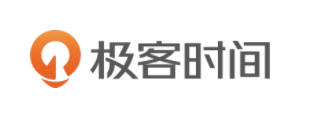

<class 'PIL.WebPImagePlugin.WebPImageFile'>
<class 'torch.Tensor'>
<class 'PIL.Image.Image'>


In [43]:
from PIL import Image
from torchvision import transforms

img = Image.open('../images/logo.jpg')
print(img)
display(img)
print(type(img)) # PIL.Image.Image 是 PIL.WebPImagePlugin.WebPImageFile 的基类

# PIL.Image 转换为 Tensor
img1 = transforms.ToTensor()(img)
print(type(img1))

# Tensor 转换为 PIL.Image
img2 = transforms.ToPILImage()(img1)  #PIL.Image.Image
print(type(img2))


### 对 PIL.Image 和 Tensor 进行变换
在 torchvision.transforms 中，提供了丰富的变换方法，例如裁剪、缩放、旋转、翻转、颜色转换等等。
#### Resize
将输入的 PIL Image 或 Tensor 尺寸调整为给定的尺寸，具体定义为：
transforms.Resize(size, interpolation=Image.BILINEAR)
* size：输出图像的尺寸，可以是一个整数(匹配图像较小的边)，也可以是一个元组，如 (h, w) （匹配图像输出尺寸）。
* interpolation：插值方法，int 类型，默认为2，即：Image.BILINEAR

插值算法通过计算输入图像像素的值来生成输出图像中的像素。具体来说：
* 当图像放大时： - 需要填补新增的像素值。 - 插值算法决定如何从邻近的像素值计算出新像素值。
* 当图像缩小时： - 需要从多个原始像素中“聚合”出一个新像素。 - 插值算法决定如何合并这些像素值。

常用插值方法及其适用场景：
* 最近邻插值（PIL.Image.NEAREST，interpolation=0） - 不进行任何插值，直接取最接近的原始像素值作为新像素值。 - 计算简单，适用于像素风格或需要保持硬边缘的场景。 - 图像质量较差，缩放时可能出现明显的锯齿或马赛克。
* 双线性插值（PIL.Image.BILINEAR，interpolation=2，默认值） - 考虑目标像素周围 2×2 的像素，通过线性加权计算出新像素值。 - 计算复杂度适中，适合大多数场景。 - 图像质量较好，适用于常规缩放操作。
* 双三次插值（PIL.Image.BICUBIC，interpolation=3） - 考虑目标像素周围 4×4 的像素，通过三次函数拟合计算新像素值。 - 比双线性插值质量更高，但计算更复杂。 - 适合需要高质量图像缩放的场景。
* 立方样条插值（PIL.Image.LANCZOS，interpolation=1） - 使用高阶滤波器进行插值，计算复杂度较高。 - 通常在需要精确、高质量的图像缩小时使用。

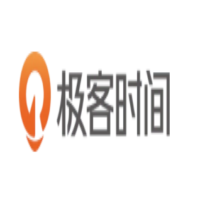

In [44]:
from PIL import Image
from torchvision import transforms

# 定义一个Resize操作
resize_img_operation = transforms.Resize((200,200), interpolation=2)

# 原图
orig_img = Image.open('../images/logo.jpg')

# Resize操作后的图
img = resize_img_operation(orig_img)
display(img)

#### 剪裁

torchvision.transforms提供了多种剪裁方法，例如中心剪裁、随机剪裁、四角和中心剪裁等。

---
##### 中心剪裁

在中心裁剪指定的 PIL Image 或 Tensor，定义如下:

`transforms.CenterCrop(size)`
* size 表示期望输出的剪裁尺寸。如果 size 是一个像 (h, w) 这样的元组，则剪裁后的图像尺寸将与之匹配。如果 size 是 int 类型的整数，剪裁出来的图像是 (size, size) 的正方形。

---
##### 随机剪裁

在一个随机位置剪裁指定的 PIL Image 或 Tensor，定义如下：

`torchvision.transforms.RandomCrop(size, padding=None)`
* size 代表期望输出的剪裁尺寸，用法同上。而 padding 表示图像的每个边框上的可选填充。默认值是 None，即没有填充。通常来说，不会用 padding 这个参数，至少对于我来说至今没用过。

---
##### 四角剪裁

将给定的 PIL Image 或 Tensor ，分别从四角和中心进行剪裁，共剪裁成五块，定义如下：

`torchvision.transforms.FiveCrop(size)`
* size 代表剪裁的尺寸，用法同上。

-----------------原图-----------------


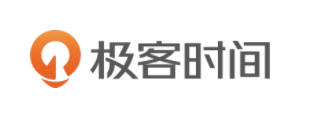


----------------中心剪裁----------------


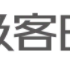


----------------随机剪裁----------------


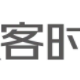


--------------四角和中心剪裁--------------


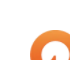

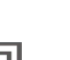

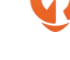

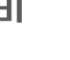

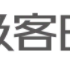

In [45]:
from PIL import Image
from torchvision import transforms

# 定义剪裁操作
center_crop_oper = transforms.CenterCrop((60,70))
random_crop_oper = transforms.RandomCrop((80,80))
five_crop_oper = transforms.FiveCrop((60,70))

# 原图
orig_img = Image.open('../images/logo.jpg')
print("-----------------原图-----------------")
display(orig_img)

# 中心剪裁
img1 = center_crop_oper(orig_img)
print("\n----------------中心剪裁----------------")
display(img1)
# 随机剪裁
img2 = random_crop_oper(orig_img)
print("\n----------------随机剪裁----------------")
display(img2)
# 四角和中心剪裁
imgs = five_crop_oper(orig_img)
print("\n--------------四角和中心剪裁--------------")
for img in imgs:
    display(img)

#### 翻转
在 torchvision.transforms 中，提供了两种翻转方法：
* torchvision.transforms.RandomHorizontalFlip(p=0.5) - 以概率 p 随机水平翻转给定的 PIL Image 或 Tensor。p 表示随机翻转的概率值，默认为 0.5。
* torchvision.transforms.RandomVerticalFlip(p=0.5) - 以概率 p 随机垂直翻转给定的 PIL Image 或 Tensor。p 表示随机翻转的概率值，默认为 0.5。

这里的随机翻转，是为数据增强提供方便。如果想要必须执行翻转操作的话，将 p 设置为 1 即可。

-----------------原图-----------------


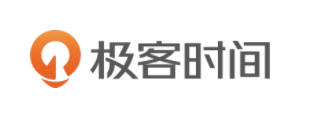


----------------水平翻转----------------


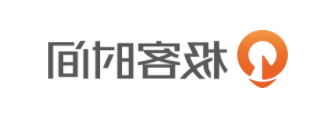


----------------垂直翻转----------------


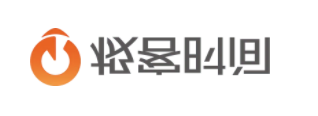

In [25]:
from PIL import Image
from torchvision import transforms

# 定义翻转操作
h_flip_oper = transforms.RandomHorizontalFlip(p=1)
v_flip_oper = transforms.RandomVerticalFlip(p=1)

# 原图
orig_img = Image.open('../images/logo.jpg')
print("-----------------原图-----------------")
display(orig_img)

# 水平翻转
img1 = h_flip_oper(orig_img)
print("\n----------------水平翻转----------------")
display(img1)
# 垂直翻转
img2 = v_flip_oper(orig_img)
print("\n----------------垂直翻转----------------")
display(img2)

### 只对 Tensor 进行变换
在 torchvision.transforms 中，提供了 Tensor 进行变换的方法：
* LinearTransformation（线性变换）
* Normalize（标准化）
* RandomErasing（随机擦除）
* ConvertImageDtype（格式转换）

##### 标准化
标准化是指每一个数据点减去所在通道的平均值，再除以所在通道的标准差，数学的计算公式如下：

`output=(input−mean)/std`

对图像进行标准化，就是对图像的每个通道利用均值和标准差进行正则化。

这样做的目的，是为了保证数据集中所有的图像分布都相似，这样在训练的时候更容易收敛，既加快了训练速度，也提高了训练效果。

在 torchvision.transforms 中，提供了 Normalize 方法，用于对 Tensor 进行标准化。

`torchvision.transforms.Normalize(mean, std, inplace=False)`
* mean - 一个表示每个通道的均值的列表。
* std - 一个表示每个通道的标准差的列表。
* inplace - 一个布尔值，表示是否在原 Tensor 上进行操作。默认值为 False。

以极客时间的 LOGO 图片为例，我们来看看以 (R, G, B) 均值和标准差均为 (0.5, 0.5, 0.5) 来标准化图片后，是什么效果。


-----------------原图-----------------


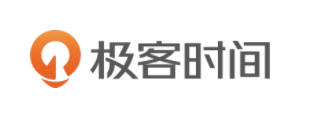


-----------------标准化---------------


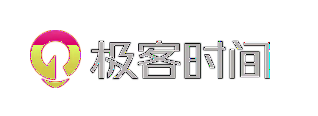

In [48]:
from PIL import Image
from torchvision import transforms

# 定义标准化操作
norm_oper = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

# 原图
orig_img = Image.open('../images/logo.jpg')
print("-----------------原图-----------------")
display(orig_img)

# 图像转化为Tensor
img_tensor = transforms.ToTensor()(orig_img)
# 标准化
tensor_norm = norm_oper(img_tensor)

# Tensor转化为图像
img_norm = transforms.ToPILImage()(tensor_norm)
print("\n-----------------标准化---------------")
display(img_norm)

### 变换的组合

其实前面介绍过的所有操作都可以用 Compose 类组合起来，进行连续操作。

Compose 类是将多个变换组合到一起，它的定义如下。

`torchvision.transforms.Compose(transforms)`
* transforms - 一个 Transform 对象的列表，表示要组合的变换列表。

如果我们想要将图片变为 200*200 像素大小，并且随机裁切成 80 像素的正方形。那么我们可以组合 Resize 和 RandomCrop 变换，具体代码如下所示。

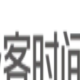

In [50]:
from PIL import Image
from torchvision import transforms

# 原图
orig_img = Image.open('../images/logo.jpg')

# 定义组合操作
composed = transforms.Compose([transforms.Resize((200, 200)),
                               transforms.RandomCrop(80)])

# 组合操作后的图
img = composed(orig_img)
display(img)

### 结合 datasets 使用

Compose 类是未来在实际项目中经常要使用到的类，结合 torchvision.datasets 包，就可以在读取数据集的时候做图像变换与数据增强操作。


In [52]:
from torchvision import transforms
from torchvision import datasets

# 定义一个transform
my_transform = transforms.Compose([transforms.ToTensor(),
                                   transforms.Normalize(0.5, 0.5)
                                  ])

# 读取MNIST数据集 同时做数据变换
mnist_dataset = datasets.MNIST(root='../data',
                               train=False,
                               transform=my_transform,
                               target_transform=None,
                               download=True)

# 查看变换后的数据类型
item = mnist_dataset.__getitem__(0)
print(type(item[0]))

<class 'torch.Tensor'>


### 小结
在实际项目中，我们往往需要将数据集进行变换，对数据进行预处理，对数据进行增强，对数据进行归一化，对数据进行裁剪，对数据进行翻转，对数据进行旋转，对数据进行缩放等等。
torchvision.transforms 提供了丰富的变换类，使得数据集的变换变得非常简单。

## 常见网络模型
在 torchvision.models 中，提供了丰富的网络模型，这些网络模型可以解决以下四大类问题：图像分类、图像分割、物体检测和视频分类。

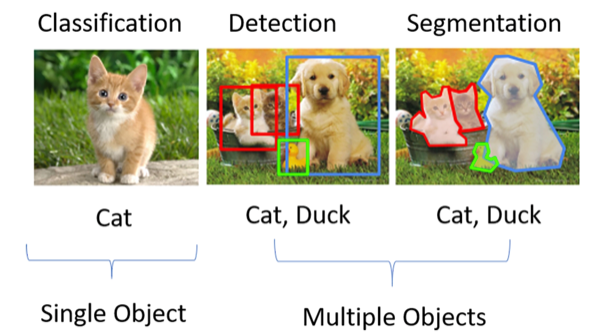

### 实例化一个 GoogLeNet 网络

GoogLeNet 是 Google 推出的基于 Inception 模块的深度神经网络模型。

GoogLeNet 获得了 2014 年的 ImageNet 竞赛的冠军，并且相比之前的 AlexNet、VGG 等结构能更高效地利用计算资源。

GoogLeNet 也被称为 Inception V1，在随后的两年中它一直在改进，形成了 Inception V2、Inception V3 等多个版本。

可以使用**随机初始化的权重，创建一个 GoogLeNet 模型**，具体代码如下：

In [55]:
import torchvision.models as models
googlenet = models.googlenet()

这时候的 GoogLeNet 模型，相当于只有一个实例化好的网络结构，里面的参数都是随机初始化的，需要经过训练之后才能使用，并不能直接用于预测。

torchvision.models 模块除了包含了定义好的网络结构，还为我们提供了预训练好的模型，我们可以直接导入训练好的模型来使用。导入预训练好的模型的代码如下：

In [56]:
from torchvision.models import GoogLeNet_Weights
import torchvision.models as models
googlenet = models.googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)

torchvision.models模块中所有预训练好的模型，都是在 ImageNet 数据集上训练的，它们都是由 PyTorch 的torch.utils.model_zoo模块所提供的，并且我们可以通过参数 pretrained=True 来构造这些预训练模型。

torchvision.models模块中可实例化的全部模型详见：https://docs.pytorch.org/vision/stable/models.html

### 模型微调

实例化了带预训练参数的网络除了可以直接用来做预测使用，还可以基于它做网络模型的微调。

微调 fine-tuning 是指，将已经训练好的模型，重新训练，使其适应新的数据集。

In [57]:
import torch
import torchvision.models as models

# 加载预训练模型
googlenet = models.googlenet(weights=GoogLeNet_Weights.IMAGENET1K_V1)

# 提取分类层的输入参数
fc_in_features = googlenet.fc.in_features
print("fc_in_features:", fc_in_features)

# 查看分类层的输出参数
fc_out_features = googlenet.fc.out_features
print("fc_out_features:", fc_out_features)

# 修改预训练模型的输出分类数(在图像分类原理中会具体介绍torch.nn.Linear)
googlenet.fc = torch.nn.Linear(fc_in_features, 10)


fc_in_features: 1024
fc_out_features: 1000


### 其他常用函数

#### make_grid
主要用于展示数据集或模型输出的图像结果

`make_grid(tensor, nrow=8, padding=2, normalize=False, scale_each=False, pad_value=0)`
* tensor - 输入的 Tensor，可以是任意维度的 Tensor。
* nrow - 默认为 8，表示每行显示的图片数量。
* padding - 默认为 2，表示图片之间的填充大小，单位：像素。
* normalize - 默认为 False，表示是否进行归一化处理。
* scale_each - 默认为 False，表示是否对每张图片进行缩放。
* pad_value - 默认为 0，表示填充的值。


torch.Size([32, 1, 28, 28])


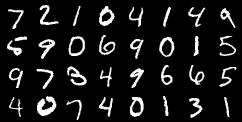

In [60]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

# 加载 MNIST 数据集
mnist_dataset = datasets.MNIST(root='../data',
                               train=False,
                               transform=transforms.ToTensor(),
                               target_transform=None,
                               download=True)
# 取 32 张图片的tensor
tensor_dataloader = DataLoader(dataset=mnist_dataset,
                               batch_size=32)
data_iter = iter(tensor_dataloader)
img_tensor, label_tensor = next(data_iter)
print(img_tensor.shape)

# 将 32 张图片拼接在一个网格中
grid_tensor = torchvision.utils.make_grid(img_tensor, nrow=8, padding=2)
grid_img = transforms.ToPILImage()(grid_tensor)
display(grid_img)

#### save_img

在保存模型输出的图片时，需要将 Tensor 类型的数据转化为图片类型才能进行保存，过程比较繁琐。Torchvision 提供了 save_image 函数，能够直接将 Tensor 保存为图片，即使 Tensor 数据在 CUDA 上，也会自动移到 CPU 中进行保存。

save_image 函数的定义如下

`save_image(tensor, filename, nrow=8, padding=2, normalize=False, range=None, scale_each=False, pad_value=0)`
* tensor - 输入的 Tensor，可以是任意维度的 Tensor。
* filename - 输出图片的文件名。
* nrow - 默认为 8，表示每行显示的图片数量。
* padding - 默认为 2，表示图片之间的填充大小，单位：像素。
* normalize - 默认为 False，表示是否进行归一化处理。
* range - 默认为 None，表示归一化的范围。
* scale_each - 默认为 False，表示是否对每张图片进行缩放。
* pad_value - 默认为 0，表示填充的值。

我们接着上面的小例子，将 32 张图片的拼接图直接保存，代码如下。

In [59]:
# 输入为一张图片的tensor 直接保存
torchvision.utils.save_image(grid_tensor, '../images/grid.jpg')

# 输入为List 会先调用 grid_img 函数，make_grid 函数的参数直接加在后面即可，然后保存
torchvision.utils.save_image(img_tensor, '../images/grid2.jpg', nrow=5, padding=2)